In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve,auc,roc_auc_score,make_scorer
import itertools
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE


In [12]:
#read dataset
data='//content//CSRF_dataset.csv'
df= pd.read_csv(data)

In [13]:
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Number of Rows: 5894
Number of Columns: 52


In [14]:
col_names = df.columns

col_names

Index(['reqId', 'flag', 'numOfParams', 'numOfIds', 'reqLen', 'createInPath',
       'createInParams', 'addInPath', 'addInParams', 'setInPath',
       'setInParams', 'deleteInPath', 'deleteInParams', 'updateInPath',
       'updateInParams', 'removeInPath', 'removeInParams', 'friendInPath',
       'friendInParams', 'settingInPath', 'settingInParams', 'passwordInPath',
       'passwordInParams', 'tokenInPath', 'tokenInParams', 'changeInPath',
       'changeInParams', 'actionInPath', 'actionInParams', 'payInPath',
       'payInParams', 'loginInPath', 'loginInParams', 'logoutInPath',
       'logoutInParams', 'postInPath', 'postInParams', 'commentInPath',
       'commentInParams', 'followInPath', 'followInParams', 'subscribeInPath',
       'subscribeInParams', 'signInPath', 'signInParams', 'viewInPath',
       'viewInParams', 'isPUT', 'isDELETE', 'isPOST', 'isGET', 'isOPTIONS'],
      dtype='object')

In [15]:
df['flag'].value_counts()

,count
flag,
0,4962
1,932


In [16]:
df.dtypes

,0
reqId,int64
flag,int64
numOfParams,int64
numOfIds,int64
reqLen,int64
createInPath,int64
createInParams,int64
addInPath,int64
addInParams,int64
setInPath,int64


In [17]:
X = df.drop(['flag'], axis=1)
y = df['flag']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
train_counts = y_train.value_counts()
print("Train set counts:")
print(train_counts)

Train set counts:
flag
0    3967
1     748
Name: count, dtype: int64


In [20]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [21]:
print("Train set counts after SMOTE:")
print(y_train_res.value_counts())

Train set counts after SMOTE:
flag
0    3967
1    3967
Name: count, dtype: int64


In [22]:
test_counts = y_test.value_counts()
print("Test set counts:")
print(test_counts)

Test set counts:
flag
0    995
1    184
Name: count, dtype: int64


In [23]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (4715, 51)
y_train: (4715,)
X_test: (1179, 51)
y_test: (1179,)


---
# Functions to give reports about models

In [24]:
y_train_pred, y_test_pred = None, None
def evaluate_model (model) :
    global y_train_pred, y_test_pred
    y_train_pred = model.predict(X_train_res)
    y_test_pred = model.predict(X_test)

In [25]:
def show_confusion_matrix ():
    cm_train = confusion_matrix(y_train_res, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    # Plot confusion matrix
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cm_train, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix - Training')
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_train)))
    plt.xticks(tick_marks, np.unique(y_train))
    plt.yticks(tick_marks, np.unique(y_train))
    fmt = 'd'
    thresh = cm_train.max() / 2.
    for i, j in itertools.product(range(cm_train.shape[0]), range(cm_train.shape[1])):
        plt.text(j, i, format(cm_train[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm_train[i, j] > thresh else "black")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.subplot(1, 2, 2)
    plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix - Testing')
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, np.unique(y_test))
    plt.yticks(tick_marks, np.unique(y_test))
    fmt = 'd'
    thresh = cm_test.max() / 2.
    for i, j in itertools.product(range(cm_test.shape[0]), range(cm_test.shape[1])):
        plt.text(j, i, format(cm_test[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm_test[i, j] > thresh else "black")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.tight_layout()
    plt.show()

In [26]:
from sklearn.metrics import classification_report, roc_auc_score

def get_classification_report():
    # Calculate predicted probabilities for training and testing sets
    y_train_pred_proba = knn_grid_search.best_estimator_.predict_proba(X_train_res)[:, 1]
    y_test_pred_proba = knn_grid_search.best_estimator_.predict_proba(X_test)[:, 1]

    # Convert predicted probabilities to binary predictions for classification report
    y_train_pred = (y_train_pred_proba >= 0.5).astype(int)
    y_test_pred = (y_test_pred_proba >= 0.5).astype(int)

    # Calculate ROC AUC score for training and testing
    roc_auc_train = roc_auc_score(y_train_res, y_train_pred_proba)
    roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)

    cr_train = classification_report(y_train_res, y_train_pred, output_dict=True)
    cr_test = classification_report(y_test, y_test_pred, output_dict=True)

    metrics = {
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC'],
        'Train': [cr_train['accuracy'], cr_train['1']['precision'], cr_train['1']['recall'], cr_train['1']['f1-score'], roc_auc_train],
        'Test': [cr_test['accuracy'], cr_test['1']['precision'], cr_test['1']['recall'], cr_test['1']['f1-score'], roc_auc_test]
    }
    metrics_df = pd.DataFrame(metrics)
    return metrics_df

In [27]:
def show_roc_curve(model):
    # Plot ROC curve and calculate AUC
    y_train_proba = model.predict_proba(X_train_res)[:,1]
    y_test_proba = model.predict_proba(X_test)[:,1]

    fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_proba)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

    auc_train = auc(fpr_train, tpr_train)
    auc_test = auc(fpr_test, tpr_test)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.2f}')
    plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

In [28]:
roc_auc_scorer = make_scorer(roc_auc_score, average='weighted', multi_class='ovr')

**Feature Scaling**

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_res = scaler.fit_transform(X_train_res)

X_test = scaler.transform(X_test)
# Display the result of the transformation
print("X_train_res:\n",X_train_res)
print("\n")
print("X_test:\n",X_test)
print("\n")

X_train_res:
 [[-0.99799345 -0.18167121 -0.38048801 ... -1.13567367  1.44594863
  -0.12906636]
 [ 1.01224797  0.30980586  1.68364318 ...  0.88053463 -0.6915875
  -0.12906636]
 [-0.42328462  0.18693659 -0.38048801 ... -1.13567367  1.44594863
  -0.12906636]
 ...
 [ 1.61618804 -0.18167121 -0.38048801 ...  0.88053463 -0.6915875
  -0.12906636]
 [-0.35635232  0.43267513  0.65157758 ...  0.88053463 -0.6915875
  -0.12906636]
 [-0.45396192 -0.42740974 -0.38048801 ...  0.88053463 -0.6915875
  -0.12906636]]


X_test:
 [[ 0.33641765  0.43267513  0.65157758 ...  0.88053463 -0.6915875
  -0.12906636]
 [-0.66643066 -0.42740974 -0.38048801 ...  0.88053463 -0.6915875
  -0.12906636]
 [-0.30573993  0.43267513 -0.38048801 ...  0.88053463 -0.6915875
  -0.12906636]
 ...
 [-1.03083986 -0.18167121  0.65157758 ...  0.88053463 -0.6915875
  -0.12906636]
 [-0.9623582  -0.05880194  0.65157758 ...  0.88053463 -0.6915875
  -0.12906636]
 [ 1.74075648 -0.05880194  0.65157758 ...  0.88053463 -0.6915875
  -0.12906636]]



In [30]:
cols = X.columns
cols

Index(['reqId', 'numOfParams', 'numOfIds', 'reqLen', 'createInPath',
       'createInParams', 'addInPath', 'addInParams', 'setInPath',
       'setInParams', 'deleteInPath', 'deleteInParams', 'updateInPath',
       'updateInParams', 'removeInPath', 'removeInParams', 'friendInPath',
       'friendInParams', 'settingInPath', 'settingInParams', 'passwordInPath',
       'passwordInParams', 'tokenInPath', 'tokenInParams', 'changeInPath',
       'changeInParams', 'actionInPath', 'actionInParams', 'payInPath',
       'payInParams', 'loginInPath', 'loginInParams', 'logoutInPath',
       'logoutInParams', 'postInPath', 'postInParams', 'commentInPath',
       'commentInParams', 'followInPath', 'followInParams', 'subscribeInPath',
       'subscribeInParams', 'signInPath', 'signInParams', 'viewInPath',
       'viewInParams', 'isPUT', 'isDELETE', 'isPOST', 'isGET', 'isOPTIONS'],
      dtype='object')

In [31]:
X_train_res = pd.DataFrame(X_train_res, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [45]:
X_train_res_df = pd.DataFrame(X_train_res, columns=X_train.columns)
print(X_train_res_df.columns.tolist())

['reqId', 'numOfParams', 'numOfIds', 'reqLen', 'createInPath', 'createInParams', 'addInPath', 'addInParams', 'setInPath', 'setInParams', 'deleteInPath', 'deleteInParams', 'updateInPath', 'updateInParams', 'removeInPath', 'removeInParams', 'friendInPath', 'friendInParams', 'settingInPath', 'settingInParams', 'passwordInPath', 'passwordInParams', 'tokenInPath', 'tokenInParams', 'changeInPath', 'changeInParams', 'actionInPath', 'actionInParams', 'payInPath', 'payInParams', 'loginInPath', 'loginInParams', 'logoutInPath', 'logoutInParams', 'postInPath', 'postInParams', 'commentInPath', 'commentInParams', 'followInPath', 'followInParams', 'subscribeInPath', 'subscribeInParams', 'signInPath', 'signInParams', 'viewInPath', 'viewInParams', 'isPUT', 'isDELETE', 'isPOST', 'isGET', 'isOPTIONS']


In [32]:
round(X_train_res.describe(),3)

,reqId,numOfParams,numOfIds,reqLen,createInPath,createInParams,addInPath,addInParams,setInPath,setInParams,...,subscribeInParams,signInPath,signInParams,viewInPath,viewInParams,isPUT,isDELETE,isPOST,isGET,isOPTIONS
count,7934.000,7934.000,7934.000,7934.000,7934.000,7934.000,7934.000,7934.000,7934.000,7934.000,...,7934.000,7934.000,7934.000,7934.000,7934.000,7934.000,7934.000,7934.000,7934.000,7934.000
mean,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,...,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.049,-0.550,-0.380,-0.202,-0.079,-0.101,-0.087,-0.094,-0.185,-0.164,...,-0.042,-0.106,-0.080,-0.151,-0.184,-0.048,-0.044,-1.136,-0.692,-0.129
25%,-0.767,-0.427,-0.380,-0.196,-0.079,-0.101,-0.087,-0.094,-0.185,-0.164,...,-0.042,-0.106,-0.080,-0.151,-0.184,-0.048,-0.044,-1.136,-0.692,-0.129
50%,-0.340,-0.305,-0.380,-0.166,-0.079,-0.101,-0.087,-0.094,-0.185,-0.164,...,-0.042,-0.106,-0.080,-0.151,-0.184,-0.048,-0.044,0.881,-0.692,-0.129
75%,0.421,0.064,-0.380,-0.063,-0.079,-0.101,-0.087,-0.094,-0.185,-0.164,...,-0.042,-0.106,-0.080,-0.151,-0.184,-0.048,-0.044,0.881,1.446,-0.129
max,3.408,18.863,13.036,59.314,12.685,9.908,11.456,10.599,5.401,6.080,...,23.785,9.442,12.557,6.620,5.433,20.971,22.977,0.881,1.446,7.748


In [33]:
round(X_test.describe(),3)

,reqId,numOfParams,numOfIds,reqLen,createInPath,createInParams,addInPath,addInParams,setInPath,setInParams,...,subscribeInParams,signInPath,signInParams,viewInPath,viewInParams,isPUT,isDELETE,isPOST,isGET,isOPTIONS
count,1179.000,1179.000,1179.000,1179.000,1179.000,1179.000,1179.000,1179.000,1179.000,1179.000,...,1179.000,1179.000,1179.000,1179.000,1179.000,1179.000,1179.000,1179.000,1179.000,1179.000
mean,-0.099,-0.086,0.013,0.041,-0.003,0.001,0.020,0.033,0.142,0.122,...,-0.022,0.016,-0.026,0.102,0.107,0.059,-0.004,-0.216,0.413,0.031
std,0.914,1.005,1.185,1.206,0.981,1.005,1.110,1.159,1.312,1.306,...,0.694,1.071,0.822,1.284,1.245,1.496,0.948,1.005,1.069,1.113
min,-1.049,-0.550,-0.380,-0.202,-0.079,-0.101,-0.087,-0.094,-0.185,-0.164,...,-0.042,-0.106,-0.080,-0.151,-0.184,-0.048,-0.044,-1.136,-0.692,-0.129
25%,-0.820,-0.550,-0.380,-0.202,-0.079,-0.101,-0.087,-0.094,-0.185,-0.164,...,-0.042,-0.106,-0.080,-0.151,-0.184,-0.048,-0.044,-1.136,-0.692,-0.129
50%,-0.372,-0.427,-0.380,-0.177,-0.079,-0.101,-0.087,-0.094,-0.185,-0.164,...,-0.042,-0.106,-0.080,-0.151,-0.184,-0.048,-0.044,-1.136,1.446,-0.129
75%,0.309,-0.059,-0.380,-0.042,-0.079,-0.101,-0.087,-0.094,-0.185,-0.164,...,-0.042,-0.106,-0.080,-0.151,-0.184,-0.048,-0.044,0.881,1.446,-0.129
max,3.408,17.020,23.357,32.042,12.685,9.908,11.456,10.599,5.401,6.080,...,23.785,9.442,12.557,6.620,5.433,20.971,22.977,0.881,1.446,7.748


### To compare models, we'll use :
#### 1. Classification report (for accuracy, precision, recall and F1 score)
#### 2. Confusion matrix
#### 3. ROC curve and AUC value

---
# KNN

### Most important hyperparameters that we have to deal with

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, roc_auc_score

# Define the parameter grid for KNN
parameters = {
    'n_neighbors': [5,8,10,15],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski','cosine']  # Distance metrics
}

# Initialize the KNeighborsClassifier with possible parameters for tuning
knn_grid_search = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model on the training data
knn_grid_search.fit(X_train_res, y_train_res)

# Best parameters found
print(f'Best parameters: {knn_grid_search.best_params_}')

# Calculate ROC AUC on the training set
y_pred_train = knn_grid_search.best_estimator_.predict_proba(X_train_res)[:, 1]
roc_auc_train = roc_auc_score(y_train_res, y_pred_train)
print("ROC AUC score on training set: ", roc_auc_train)

# Calculate ROC AUC on the testing set
y_pred_test = knn_grid_search.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_pred_test)
print("ROC AUC score on testing set: ", roc_auc_test)


Best parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
ROC AUC score on training set:  0.9999998729116929
ROC AUC score on testing set:  0.9139993445488312


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, roc_auc_score

# Define the parameter grid for KNN
parameters = {
    'n_neighbors': [x for x in range(1,10)],  # Number of neighbors to consider
    'weights': ['uniform'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski','cosine']  # Distance metrics
}


# Initialize the KNeighborsClassifier with possible parameters for tuning
knn_grid_search = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model on the training data
knn_grid_search.fit(X_train_res, y_train_res)

# Best parameters found
print(f'Best parameters: {knn_grid_search.best_params_}')

# Calculate ROC AUC on the training set
y_pred_train = knn_grid_search.best_estimator_.predict_proba(X_train_res)[:, 1]
roc_auc_train = roc_auc_score(y_train_res, y_pred_train)
print("ROC AUC score on training set: ", roc_auc_train)

# Calculate ROC AUC on the testing set
y_pred_test = knn_grid_search.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_pred_test)
print("ROC AUC score on testing set: ", roc_auc_test)


Best parameters: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'uniform'}
ROC AUC score on training set:  0.9874475514499537
ROC AUC score on testing set:  0.895119619838322


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, roc_auc_score

# Define the parameter grid for KNN
parameters = {
    'n_neighbors': [x for x in range(10,15)],  # Number of neighbors to consider
    'weights': ['uniform'],  # Weight function used in prediction
    'metric': ['minkowski','cosine']  # Distance metrics
}


# Initialize the KNeighborsClassifier with possible parameters for tuning
knn_grid_search = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model on the training data
knn_grid_search.fit(X_train_res, y_train_res)

# Best parameters found
print(f'Best parameters: {knn_grid_search.best_params_}')

# Calculate ROC AUC on the training set
y_pred_train = knn_grid_search.best_estimator_.predict_proba(X_train_res)[:, 1]
roc_auc_train = roc_auc_score(y_train_res, y_pred_train)
print("ROC AUC score on training set: ", roc_auc_train)

# Calculate ROC AUC on the testing set
y_pred_test = knn_grid_search.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_pred_test)
print("ROC AUC score on testing set: ", roc_auc_test)


Best parameters: {'metric': 'cosine', 'n_neighbors': 10, 'weights': 'uniform'}
ROC AUC score on training set:  0.9784653311676639
ROC AUC score on testing set:  0.8920089578326414


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, roc_auc_score

# Define the parameter grid for KNN
parameters = {
    'n_neighbors': [x for x in range(20,35)],  # Number of neighbors to consider
    'weights': ['uniform'],  # Weight function used in prediction
    'metric': ['minkowski','cosine','manhattan']  # Distance metrics
}


# Initialize the KNeighborsClassifier with possible parameters for tuning
knn_grid_search = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model on the training data
knn_grid_search.fit(X_train_res, y_train_res)

# Best parameters found
print(f'Best parameters: {knn_grid_search.best_params_}')

# Calculate ROC AUC on the training set
y_pred_train = knn_grid_search.best_estimator_.predict_proba(X_train_res)[:, 1]
roc_auc_train = roc_auc_score(y_train_res, y_pred_train)
print("ROC AUC score on training set: ", roc_auc_train)

# Calculate ROC AUC on the testing set
y_pred_test = knn_grid_search.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_pred_test)
print("ROC AUC score on testing set: ", roc_auc_test)


Best parameters: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}
ROC AUC score on training set:  0.9684997015648829
ROC AUC score on testing set:  0.8865495958051126


In [38]:
knn_model = knn_grid_search.best_estimator_
evaluate_model(knn_model)

In [39]:
get_classification_report()

,Metric,Train,Test
0,Accuracy,0.895261,0.819338
1,Precision,0.873333,0.456193
2,Recall,0.924628,0.820652
3,F1-score,0.898249,0.586408
4,ROC AUC,0.968500,0.886550


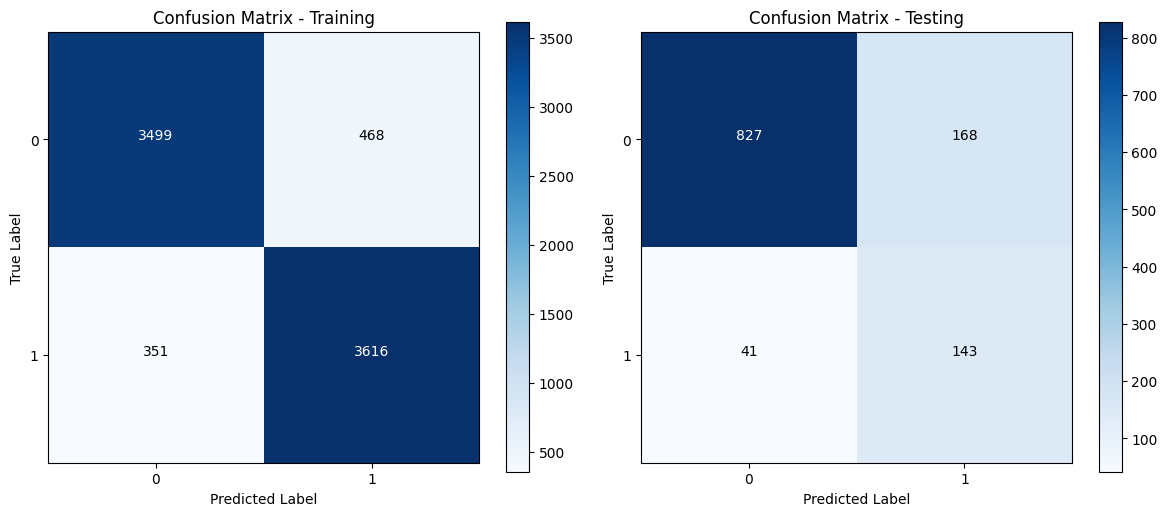

In [40]:
show_confusion_matrix()

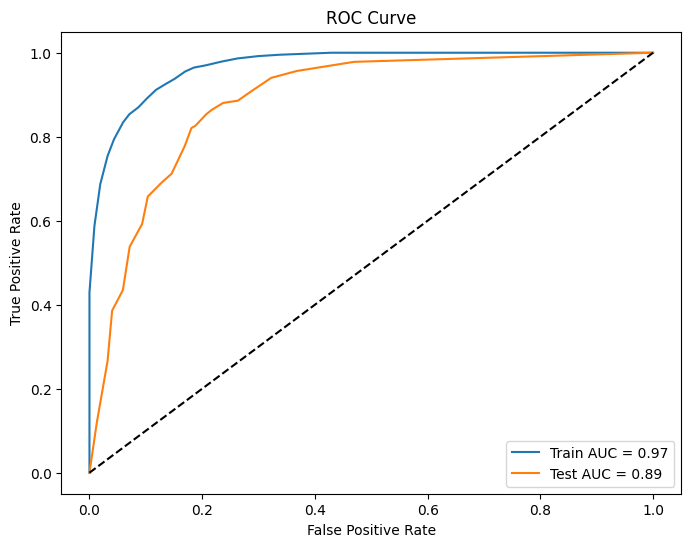

In [41]:
show_roc_curve(knn_model)

In [42]:
import pickle
path = "/content/drive/MyDrive/models/knn_model.pkl"

# Save the model to a file
with open(path, 'wb') as file:
    pickle.dump(knn_model, file)


In [46]:
import pickle
import pickle

record = "3,0,0,0,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0"
input_data = pd.DataFrame([list(map(float, record.split(',')))])
input_data.columns = ['reqId', 'numOfParams', 'numOfIds', 'reqLen', 'createInPath', 'createInParams', 'addInPath', 'addInParams', 'setInPath', 'setInParams', 'deleteInPath', 'deleteInParams', 'updateInPath', 'updateInParams', 'removeInPath', 'removeInParams', 'friendInPath', 'friendInParams', 'settingInPath', 'settingInParams', 'passwordInPath', 'passwordInParams', 'tokenInPath', 'tokenInParams', 'changeInPath', 'changeInParams', 'actionInPath', 'actionInParams', 'payInPath', 'payInParams', 'loginInPath', 'loginInParams', 'logoutInPath', 'logoutInParams', 'postInPath', 'postInParams', 'commentInPath', 'commentInParams', 'followInPath', 'followInParams', 'subscribeInPath', 'subscribeInParams', 'signInPath', 'signInParams', 'viewInPath', 'viewInParams', 'isPUT', 'isDELETE', 'isPOST', 'isGET', 'isOPTIONS']


# Load the model from the file
with open(path, 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can use the loaded model for predictions
predictions = loaded_model.predict(input_data)
print("Predictions: ", predictions)

# Load the model from the file
with open(path, 'rb') as file:
    loaded_model = pickle.load(file)
record = "3,0,0,0,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0"
input_data = pd.DataFrame([list(map(float, record.split(',')))])
input_data.columns = [f'feature_{i}' for i in range(input_data.shape[1])]
# Now you can use the loaded model for predictions
predictions = loaded_model.predict(input_data)
print("Predictions: ", predictions)


Predictions:  [0]
Predictions:  [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
